# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

#### Created by Silvia Huang, CFFS Data Analyst
***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import pdpipe as pdp
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest
pd.set_option('mode.chained_assignment', None)

C:\Users\smvan\anaconda3\lib\site-packages\pdpipe\col_generation.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# Set the root path, change the the current working directory into the project folder
path = "C:/Users/smvan/CFFS-S23/CFFS-22-23"
# path = os.getcwd()
os.chdir(path)

In [4]:
# Enable reading data table in the scrolling window if you prefer
pd.set_option("display.max_rows", None, "display.max_columns", None)

***
## Import Cleaned Datasets

In [5]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [6]:
Items.head()

,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-11181,ANISE STAR WHOLE,8.0,each,240.0,g,SPICES
1,I-4473,AVOCADO (20CT) MX,20.0,CT,1.0,HEAD,PRODUCE
2,I-4472,AVOCADO MX,20.0,CT,1.0,CT,PRODUCE
3,I-4973,AVOCADO PULP CHUNKY,12.0,bag,454.0,g,PRODUCE
4,I-27410,BACON 3MM NATURALLY SMKD,5.0,Kg,1.0,Kg,MEAT


In [7]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [8]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-4598,1.000,CT,1.000000,0.0013,P-12954
1,I-3619,5.000,g,1.000000,0.5000,P-14161
2,I-3649,10.000,g,1.000000,1.0000,P-14161
3,I-3992,5.000,Kg,1.000000,0.5000,P-14161
4,I-4589,907.184,g,0.002205,90.7184,P-14161


In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(54, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

,ProdId,Description,SalesGroup
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP
4,R-31955,SIDE|Soup|16oz,OK - SOUP


In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,NaN,1.000000,1.0000,XXX,1.0000,L
1,NaN,0.877193,1.0000,1.14L,1.1400,L
2,NaN,0.666667,1.0000,1.5L,1.5000,L
3,NaN,0.571429,1.0000,1.75 L,1.7500,L
4,NaN,0.500000,1.0000,2L,2.0000,L
5,NaN,0.250000,1.0000,4L,4.0000,L
6,NaN,0.083333,1.0000,FOOT,12.0000,INCH
7,NaN,0.062500,1.0000,16L,16.0000,L
8,NaN,0.059172,1.0000,1/2LTR,16.9000,fl oz
9,NaN,0.039370,1.0000,750ML,25.4000,fl oz


In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-57545,1.0,CHUCK FLAT BONELESS FZN,3.300,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
1,I-10869,1.0,BEEF STIRFRY COV FR,5.000,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
2,I-7064,1.0,BEEF OUTSIDE FLAT AAA,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
3,I-37005,1.0,BEEF MEATBALLS,4.540,Kg,1000.000,g,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
4,I-37002,1.0,BEEF INSIDE ROUND SHAVED,9.000,Kg,1000.000,g,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
5,I-3876,1.0,BEEF CHUCK GROUND AAA,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
6,I-34065,1.0,BEEF BONES KNUCKLE FZ,1.000,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
7,I-11661,1.0,"BEEF STEW 3/4"" FROZEN",5.000,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
8,I-3837,1.0,"BEEF STEW DICED 3/4""FR",1.000,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000
9,I-43648,1.0,BRISKET BEEF CORN SMKD FR,4.500,Kg,1.000,Kg,MEAT,41.346300,329.500000,0.12645,1677.200000,61309.0000


In [17]:
# Mapping.csv was created in 3_update info and mapping
check = mapping["ItemId"].duplicated().any()
check

False

In [18]:
mapping.loc[mapping["ItemId"] == 'I-62863']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
1988,I-62863,59.0,CK|G&G|HMR|Meat Ball & Pasta.,1.0,ea,1.0,ea,PRODUCTION FOOD,0.0,0.0,0.0,0.0,0.0


### Unit Converter

In [19]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [20]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-54697,LEMON|Wedge 1/8,8.0,each,PREP,84.0,g
1,P-35132,MARINATED|Lemon & Herb Chx,185.0,ea,PREP,24050.0,g
2,P-51992,YIELD|Bread|Sourdough 5/8,36.0,slice,NaN,1620.0,g
3,P-26234,BATCH|Roasted Garlic Bread,16.0,ea,PREP,1280.0,g
4,P-26170,GRILLED|NaanBread,1.0,ea,PREP,125.0,g


In [21]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()


# ORIGINAL CODE BELOW:

# There was an issue where the values of Multiplier per row was not being added to the dataframe correctly

# Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
# Prep_cov.insert(1, "Multiplier", '')
# Prep_cov.columns = Conversions.columns
# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
# Prep_cov.head()


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
231,P-67553,0.014085,60.0,each,4260.0,g
232,P-68103,0.041667,50.0,each,1200.0,g
233,P-66019,0.004,4.0,piece,1000.0,g
234,P-67284,0.005882,100.0,each,17000.0,g
235,P-64887,0.011765,160.0,each,13600.0,g


In [22]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
640,P-67553,0.014085,60.0,each,4260.0,g
641,P-68103,0.041667,50.0,each,1200.0,g
642,P-66019,0.004,4.0,piece,1000.0,g
643,P-67284,0.005882,100.0,each,17000.0,g
644,P-64887,0.011765,160.0,each,13600.0,g


In [23]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [24]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [25]:
# Test the std_converter
std_converter(0.25,'lb')

(113.398, 'g')

In [26]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [27]:
spc_cov

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'I-1813',
 'I-1813',
 'I-2217',
 'I-2254',
 'I-2254',
 'I-3141',
 'I-3149',
 'I-3388',
 'I-3388',
 'I-3388',
 'I-3389',
 'I-3389',
 'I-3389',
 'I-3619',
 'I-3623',
 'I-3623',
 'I-3628',
 'I-3628',
 'I-3630',
 'I-3638',
 'I-3638',
 'I-3643',
 'I-3649',
 'I-4375',
 'I-4472',
 'I-4473',
 'I-4574',
 'I-4598',
 'I-4599',
 'I-4599',
 'I-4679',
 'I-4712',
 'I-4745',
 'I-4826',
 'I-5977',
 'I-5977',
 'I-5977',
 'I-5983',
 'I-5983',
 'I-6443',
 'I-6443',
 'I-7710',
 'I-8058',
 'I-8060',
 'I-8060',
 'I-14181',
 'I-22026',
 'I-22026',
 'I-45114',
 'I-1028',
 'I-1034',
 'I-1035',
 'I-10605',
 'I-1126',
 'I-1127',
 'I-1141',
 'I-1143',
 'I-11519',
 'I-1152',
 'I-11842',
 'I-1207',
 'I-1223',
 'I-1232',
 'I-1252',
 'I-1254',
 'I-1257',
 'I-1273',
 'I-13004',
 'I-15032',
 'I-15358'

In [28]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

(1, 'CT')

In [29]:
spc_converter('P-35132', 1, 'ea')

(130.00000000000156, 'g')

## GHG Factors Calculation for Preps

In [30]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [31]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-4598,1.000,CT,1.000000,0.0013,P-12954
1,I-3619,5.000,g,1.000000,0.5000,P-14161
2,I-3649,10.000,g,1.000000,1.0000,P-14161
3,I-3992,5.000,Kg,1.000000,0.5000,P-14161
4,I-4589,907.184,g,0.002205,90.7184,P-14161


In [32]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom


In [33]:
Preps.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-26393,BATCH|Crisp Tortilla Strips|OK,0.907,Kg,PREP,907.0,g,0,0,0,0,0,0,0,0,0,0
1,P-56398,BATCH|Guacamole,2.750,Kg,PREP,2750.0,g,0,0,0,0,0,0,0,0,0,0
2,P-35648,BATCH|Tomato Bisque,8.000,L,PREP,8000.0,ml,0,0,0,0,0,0,0,0,0,0
3,P-50651,BLANCHED|Bok Choy,5.000,Kg,PREP,5000.0,g,0,0,0,0,0,0,0,0,0,0
4,P-35818,BROTH|Chicken Dumpling,40.000,L,PREP,40000.0,ml,0,0,0,0,0,0,0,0,0,0


In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            print(ingre)
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            print(ghge)
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                print("Test")
                qty = std_converter(Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

I-15358
387    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
387    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-51440
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-22026
1421    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1421    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4473
725    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
725    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4973
711    0.4306
Name: Active Total Supply

In [36]:
mapping.loc[mapping["ItemId"] == "I-5012"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
720,I-5012,31.0,PEACH SLCD GRADE A IQF,2.0,bag,2.5,Kg,PRODUCE,0.4306,2.7,0.00071,3.5,4.7


In [37]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, qty*float(ghge))
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [38]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1.57861500e+06, 1.34307505e+04, 4.77001000e+05, 2.72500000e+05,
       7.47103500e+06, 8.42287379e+07, 2.77207500e+04, 1.83750601e+06,
       1.62600000e+04, 0.00000000e+00, 1.03187100e+05, 1.57790000e+06,
       1.12860000e+05, 1.86990000e+06, 3.50000000e+02, 1.13355000e+05,
       5.60250000e+03, 1.01868000e+04, 2.34144000e+06, 5.70912400e+03,
       2.50580053e+03, 1.91609815e+06, 1.43079250e+04, 5.36300000e+03,
       1.59672000e+05, 6.63000076e+02, 2.84999986e+01, 2.88150000e+04,
       3.92450000e+04, 1.85541500e+06, 7.46982500e+05, 3.74314250e+06,
       4.45843235e+04, 1.31704180e+06, 6.25059250e+05, 4.57499000e+04,
       1.48324584e+06, 6.50400000e+04, 7.40600000e+05, 7.31700000e+03,
       6.45348831e+03, 1.90316800e+05, 8.13000000e+04, 3.69102000e+05,
       3.58002300e+06, 1.04640000e+06, 3.68770296e+04, 7.70000000e+05,
       8.61824800e+02])

In [39]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, ghge, Qty, Uom, qty, weight)
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [40]:
for index, row in Preps.iterrows():
    link_preps(index, row)

   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
12      P-26514  500.0   g         1.0     1000.0  P-24750
   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
79      P-24452  11.55  Kg     2.20462      1.049  P-39167
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
105      P-26100  1.0   L         1.0        0.5  P-45010


In [41]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

In [42]:
Preps.tail(30)

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
24,P-57227,PREP|Mirepoix,4.000,Kg,NaN,4000.0000,g,1865.358611,0.466340,39.831699,0.009958,1.519450e+05,37.986243,5.139850e+06,1284.962576,3.573449,0.000893
25,P-14161,PREP|Stock|Chicken,10.000,L,PREP,10000.0000,ml,22946.681073,2.294668,602.469284,0.060247,1.916098e+06,191.609815,3.270098e+06,327.009789,59.393839,0.005939
26,P-53277,PREP|Veg Stock,10.300,L,NaN,10300.0000,ml,932.679305,0.090551,21.353599,0.002073,9.028041e+04,8.765088,2.821664e+06,273.947979,1.786725,0.000173
27,P-26020,PUREE|Garlic|Kg - FT,2.500,Kg,PREP,2500.0000,g,3114.480000,1.245792,18.083000,0.007233,5.363000e+03,2.145200,1.395900e+05,55.836000,13.075600,0.005230
28,P-43707,SAUCE|Creme Fraiche,3.500,L,PREP,3500.0000,ml,28465.400000,8.132971,117.024000,0.033435,1.596720e+05,45.620571,1.243558e+08,35530.230857,31.692000,0.009055
29,P-44506,SLICED|Avocado|Quarter,4.000,each,NaN,160.0000,g,60.532609,0.378329,0.380700,0.002379,6.630001e+02,4.143750,7.366700e+03,46.041876,0.098660,0.000617
30,P-39057,SLICED|Green Onion v1,150.000,g,PREP,150.0000,g,4.522500,0.030150,0.118500,0.000790,2.850000e+01,0.190000,8.550000e+02,5.700000,0.007950,0.000053
31,P-45009,SOUP|Beef Pho,16.500,L,PREP,16500.0000,ml,550631.202633,33.371588,4397.191404,0.266496,2.236051e+07,1355.182622,8.194625e+08,49664.393830,1681.769296,0.101925
32,P-31111,SOUP|Miso,20.000,L,PREP,20000.0000,ml,4059.805000,0.202990,13.965000,0.000698,3.924500e+04,1.962250,2.414950e+05,12.074750,9.581500,0.000479
33,P-44505,SOUP|Tortillia|CAL,50.000,L,PREP,50000.0000,ml,148477.310046,2.969546,3388.419286,0.067768,1.183582e+07,236.716330,1.115971e+08,2231.942323,397.593460,0.007952


In [43]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe


In [44]:
Preps["GHG Emission (g)"].unique()

array([6.02916320e+03, 1.48621690e+03, 5.38902223e+03, 3.11000000e+03,
       9.15127450e+04, 2.07403650e+06, 2.13490400e+03, 2.13617042e+04,
       1.00580000e+02, 3.62904984e+02, 5.60395500e+02, 2.54770000e+03,
       3.49068000e+03, 1.15667000e+04, 3.86925000e+03, 4.76438400e+03,
       3.63866053e+04, 1.43292100e+03, 3.50599000e+03, 2.54831750e+03,
       1.43114450e+04, 1.44835200e+04, 3.92388994e+03, 2.64114055e+01,
       1.86535861e+03, 2.29466811e+04, 9.32679305e+02, 3.11448000e+03,
       2.84654000e+04, 6.05326094e+01, 4.52249977e+00, 5.50631203e+05,
       4.05980500e+03, 1.48477310e+05, 1.62635000e+03, 4.54527055e+04,
       0.00000000e+00, 1.48871090e+04, 1.15077771e+04, 6.80364035e+02,
       1.69280534e+04, 4.02320000e+02, 8.79920000e+03, 4.52610000e+01,
       3.99195482e+01, 6.91215000e+02, 5.02900000e+02, 2.28316600e+03,
       5.75331500e+03, 1.19424000e+04, 2.28111417e+02, 6.93200000e+03,
       1.36757988e+02])

In [45]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [46]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['Land Use (m^2)'] = 0

In [47]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            
            # most recently added
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [48]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [49]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,I-4598,1.000,CT,1.000000,0.0013,P-12954
1,I-3619,5.000,g,1.000000,0.5000,P-14161
2,I-3649,10.000,g,1.000000,1.0000,P-14161
3,I-3992,5.000,Kg,1.000000,0.5000,P-14161
4,I-4589,907.184,g,0.002205,90.7184,P-14161
5,I-4599,1.000,HEAD,1.000000,0.1000,P-14161
6,I-4742,907.184,g,0.002205,90.7184,P-14161
7,I-4919,56.699,g,0.002205,5.6699,P-14161
8,I-5983,12.000,L,1.000000,1.2000,P-14161
9,I-3643,225.000,g,0.001000,0.1837,P-18907


In [50]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN,0,0,0,0,0,0
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN,0,0,0,0,0,0
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN,0,0,0,0,0,0
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP,0,0,0,0,0,0
4,R-31955,SIDE|Soup|16oz,OK - SOUP,0,0,0,0,0,0
5,R-37630,SIDE|Soup|Miso,OK - SOUP,0,0,0,0,0,0
6,R-47565,SOUP|Tortilla,OK- VEGETARIAN KITCHEN FEATURE,0,0,0,0,0,0
7,R-60569,TRUCK|GrilledCheese|Bacon Avo,OK - FOOD TRUCK(Food),0,0,0,0,0,0
8,R-60558,TRUCK|Grl Cheese & Tom Soup|,OK - FOOD TRUCK(Food),0,0,0,0,0,0
9,R-35651,TRUCK|Tomato Soup,OK - FOOD TRUCK(Food),0,0,0,0,0,0


In [51]:
Products["ProdId"].unique()

array(['R-44511', 'R-28260', 'R-35819', 'R-50482', 'R-31955', 'R-37630',
       'R-47565', 'R-60569', 'R-60558', 'R-35651', 'R-35319', 'R-35269',
       'R-46574'], dtype=object)

In [52]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('R'):
            ghge = Products.loc[Products['ProdId'] == ingre, 'GHG Emission (g)']
            nitro_fac = Products.loc[Products['ProdId'] == ingre, 'N lost (g)']
            water_fac = Products.loc[Products['ProdId'] == ingre, 'Freshwater Withdrawals (ml)']
            str_water_fac = Products.loc[Products['ProdId'] == ingre, 'Stress-Weighted Water Use (ml)']
            
            # most recently added
            land_fac = Products.loc[Products["ProdId"] == ingre, "Land Use (m^2)"]
            
            Weight = Products.loc[Products['ProdId'] == ingre, 'Weight (g)']
            Qty = float(ingres.loc[idx,'Qty'])
            ghg += Qty*float(ghge)
            nitro += Qty*float(nitro_fac)
            water += Qty*float(water_fac)
            str_water += Qty*float(str_water_fac)
            weight += Qty*float(Weight)
            
            # most recently added
            land += Qty * float(land_fac)
            
            #print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [53]:
for index, row in Products.iterrows():
    get_items_ghge(index , row)

In [54]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

In [55]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

Index: 0 
Ingres:
     IngredientId    Qty   Uom  Conversion  InvFactor   Recipe
197       I-6443    5.0    ml    0.033814        1.0  R-44511
198      P-26393   40.0     g    0.001000        1.0  R-44511
199      P-44505  320.0    ml    0.001000        1.0  R-44511
200      P-44506    0.5  each    1.000000        1.0  R-44511
201      P-44510    3.0     g    1.000000        1.0  R-44511
Index: 1 
Ingres:
     IngredientId    Qty    Uom  Conversion  InvFactor   Recipe
161      I-17671   30.0      g    0.001000        1.0  R-28260
162       I-4509   15.0      g    0.002205        1.0  R-28260
163      P-43718  120.0      g    0.001000        1.0  R-28260
164      P-44585    1.0  piece    1.000000        1.0  R-28260
165      P-45009  140.0     ml    0.001000        1.0  R-28260
166      P-50781    3.0      g    1.000000        1.0  R-28260
167      P-51582   10.0      g    0.001000        1.0  R-28260
168      P-62008   10.0      g    1.000000        1.0  R-28260
Index: 2 
Ingres:
     

In [56]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom


In [57]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [58]:
for index, row in Products.iterrows():
    filter_products(index, row)

In [59]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [60]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [61]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN,388.000000,1228.402759,24.238125,3.430957,146.08,2879.54,316.60,6.25,37.65,742.15,0.88
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN,338.500000,6121.497318,47.948283,18.283512,357.30,9230.04,1808.42,14.16,105.55,2726.75,5.40
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN,715.000000,1368.736873,28.313328,2.580515,220.36,1683.20,191.43,3.96,30.82,235.41,0.36
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP,417.000000,1955.144544,20.803418,2.160149,125.79,3132.71,468.86,4.99,30.17,751.25,0.52
4,R-31955,SIDE|Soup|16oz,OK - SOUP,473.176000,0.000000,0.000000,0.000000,0.47,0.47,0.00,0.00,0.10,0.10,0.00
5,R-37630,SIDE|Soup|Miso,OK - SOUP,454.000000,92.157573,0.317006,0.217500,0.89,5.48,20.30,0.07,0.20,1.21,0.05
6,R-47565,SOUP|Tortilla,OK- VEGETARIAN KITCHEN FEATURE,704.000005,508.503878,3.753598,1.334324,97.96,3187.34,72.23,0.53,13.91,452.75,0.19
7,R-60569,TRUCK|GrilledCheese|Bacon Avo,OK - FOOD TRUCK(Food),280.000001,1864.540572,21.193008,3.212422,300.53,11626.12,665.91,7.57,107.33,4152.19,1.15
8,R-60558,TRUCK|Grl Cheese & Tom Soup|,OK - FOOD TRUCK(Food),661.000001,2270.235369,24.330537,3.741884,324.24,13649.76,343.45,3.68,49.05,2065.02,0.57
9,R-35651,TRUCK|Tomato Soup,OK - FOOD TRUCK(Food),381.000000,405.694797,3.137529,0.529462,23.71,2023.65,106.48,0.82,6.22,531.14,0.14


In [62]:
Products.shape

(13, 14)

In [63]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [64]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

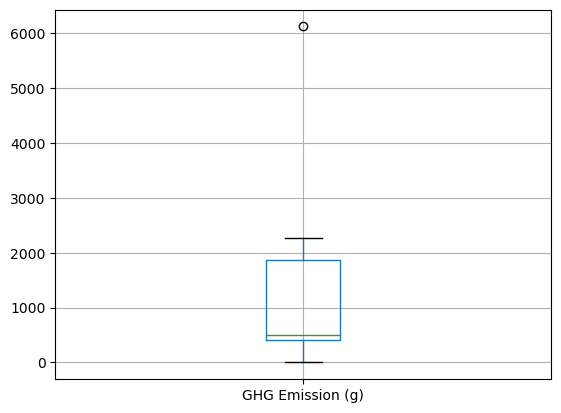

In [65]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [66]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [67]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [68]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

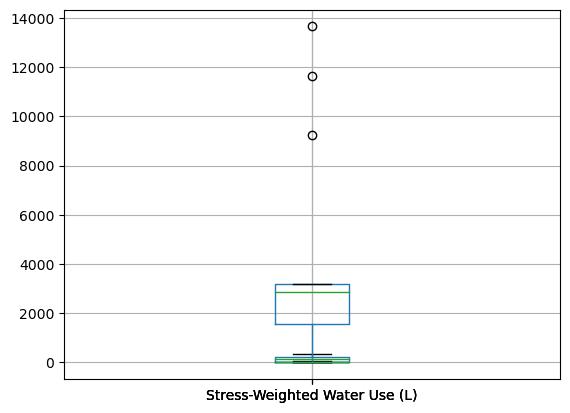

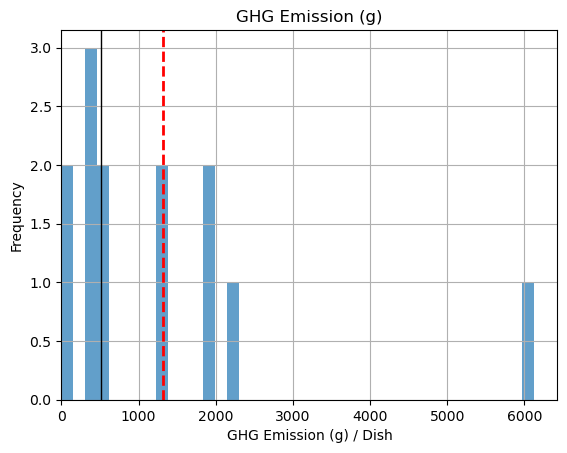

In [69]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

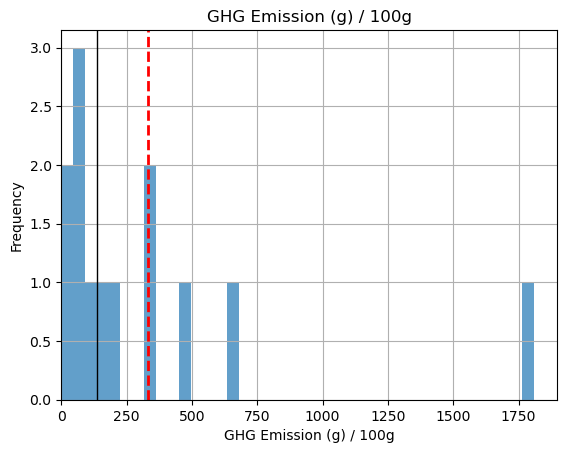

In [70]:
Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_100g.png')
plt.show()

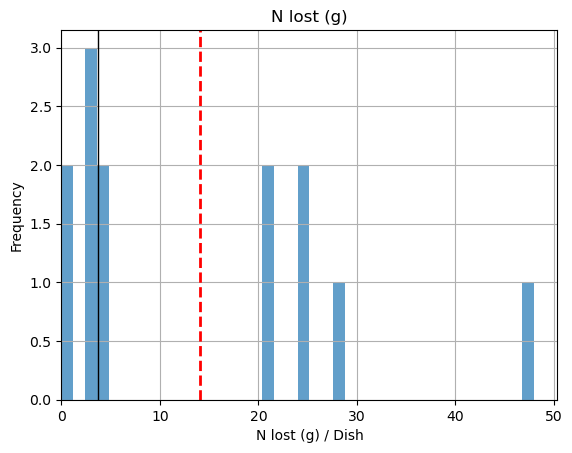

In [71]:
Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'N lost_dish.png')
plt.show()

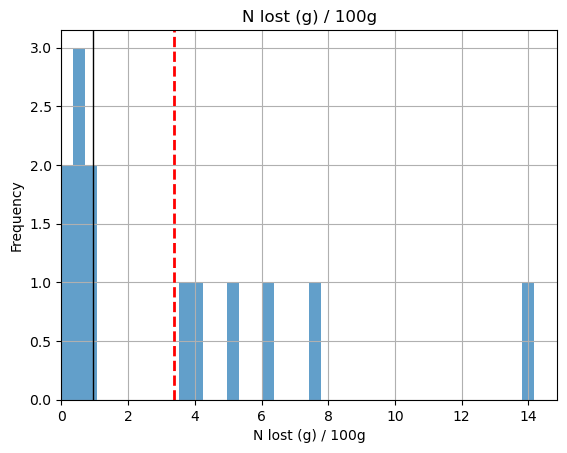

In [72]:
Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'N lost_100g.png')
plt.show()

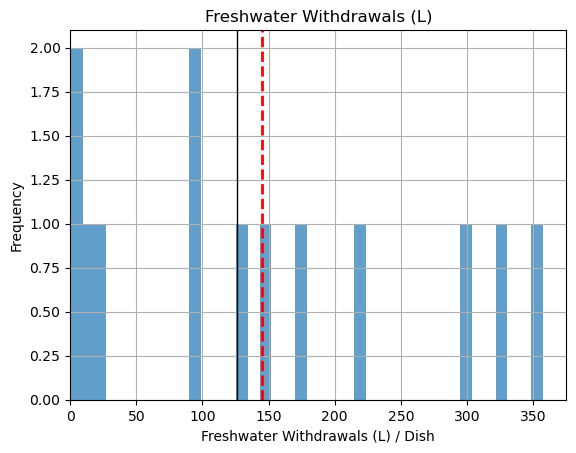

In [73]:
Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Freshwater Withdrawals (L) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Fresh water_dish.png')
plt.show()

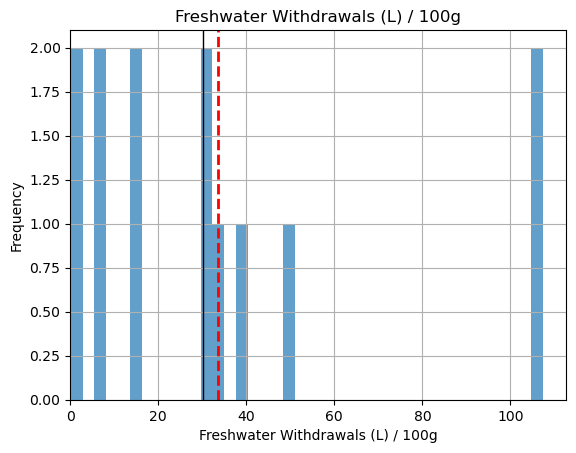

In [74]:
Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Freshwater Withdrawals (L) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Fresh water_100g.png')
plt.show()

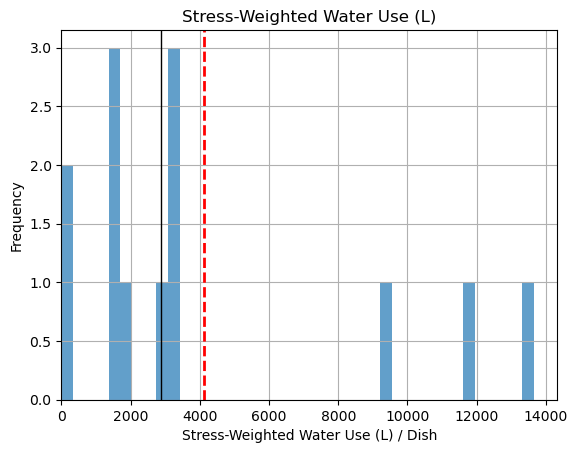

In [75]:
Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Stress-Weighted Water Use (L) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Stress water_dish.png')
plt.show()

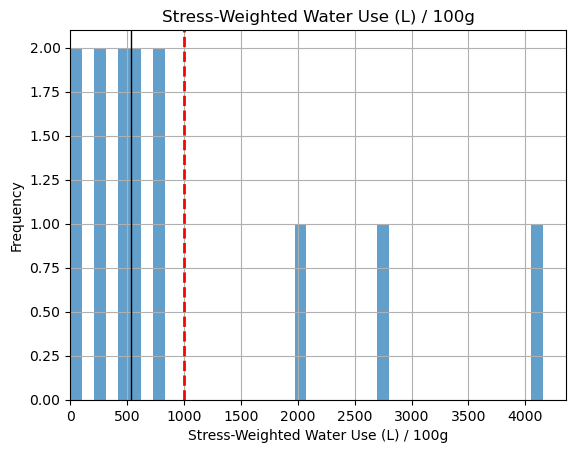

In [76]:
Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Stress-Weighted Water Use (L) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Stress water_100g.png')
plt.show()

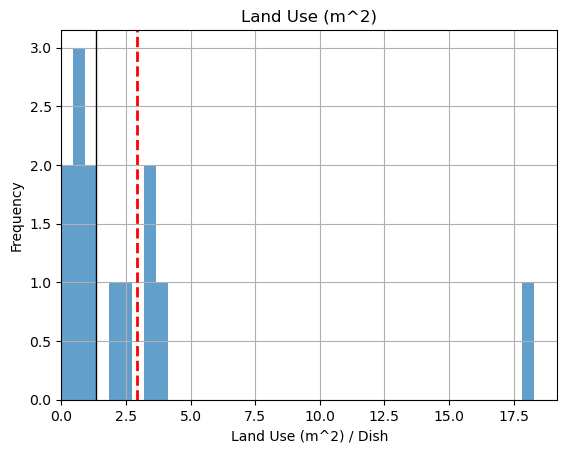

In [77]:
Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Land Use (m^2) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Land_Use_(m^2).png')
plt.show()

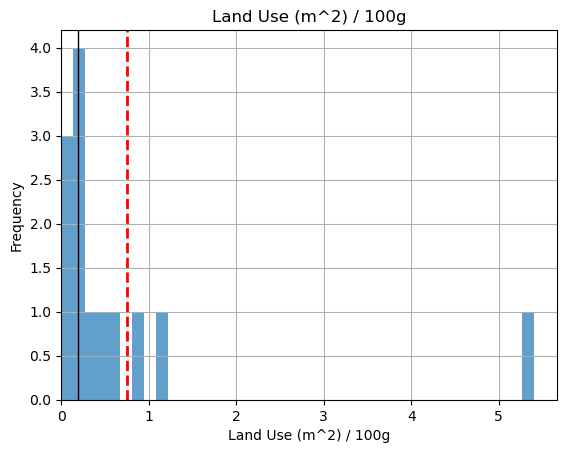

In [78]:
Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Land Use (m^2) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
plt.show()

In [79]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN,388.000000,1228.402759,24.238125,3.430957,146.08,2879.54,316.60,6.25,37.65,742.15,0.88
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN,338.500000,6121.497318,47.948283,18.283512,357.30,9230.04,1808.42,14.16,105.55,2726.75,5.40
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN,715.000000,1368.736873,28.313328,2.580515,220.36,1683.20,191.43,3.96,30.82,235.41,0.36
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP,417.000000,1955.144544,20.803418,2.160149,125.79,3132.71,468.86,4.99,30.17,751.25,0.52
4,R-31955,SIDE|Soup|16oz,OK - SOUP,473.176000,0.000000,0.000000,0.000000,0.47,0.47,0.00,0.00,0.10,0.10,0.00
5,R-37630,SIDE|Soup|Miso,OK - SOUP,454.000000,92.157573,0.317006,0.217500,0.89,5.48,20.30,0.07,0.20,1.21,0.05
6,R-47565,SOUP|Tortilla,OK- VEGETARIAN KITCHEN FEATURE,704.000005,508.503878,3.753598,1.334324,97.96,3187.34,72.23,0.53,13.91,452.75,0.19
7,R-60569,TRUCK|GrilledCheese|Bacon Avo,OK - FOOD TRUCK(Food),280.000001,1864.540572,21.193008,3.212422,300.53,11626.12,665.91,7.57,107.33,4152.19,1.15
8,R-60558,TRUCK|Grl Cheese & Tom Soup|,OK - FOOD TRUCK(Food),661.000001,2270.235369,24.330537,3.741884,324.24,13649.76,343.45,3.68,49.05,2065.02,0.57
9,R-35651,TRUCK|Tomato Soup,OK - FOOD TRUCK(Food),381.000000,405.694797,3.137529,0.529462,23.71,2023.65,106.48,0.82,6.22,531.14,0.14


In [81]:
Products.to_csv('C:/Users/smvan/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)
